In [7]:
import os
import sys
import time
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('Iris.csv')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df = df.drop(['Id'] , axis = 1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


####
 checking values for the dependent variables

In [13]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [14]:

X = df.iloc[:, :-1]
y = df.iloc[: , -1]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
len(X_train),len(y_train)

(120, 120)

In [17]:
len(X_test),len(y_test)

(30, 30)

In [18]:
X_train.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
139,6.9,3.1,5.4,2.1
50,7.0,3.2,4.7,1.4
14,5.8,4.0,1.2,0.2
8,4.4,2.9,1.4,0.2
46,5.1,3.8,1.6,0.2
37,4.9,3.1,1.5,0.1
113,5.7,2.5,5.0,2.0
146,6.3,2.5,5.0,1.9
5,5.4,3.9,1.7,0.4


**variable transformations**

In [19]:
def visualization_eda(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.subplot(1,3,3)
  plt.title('probplot')
  stats.probplot(X_train[var],dist='norm',plot=plt)
  plt.show()


SepalLengthCm


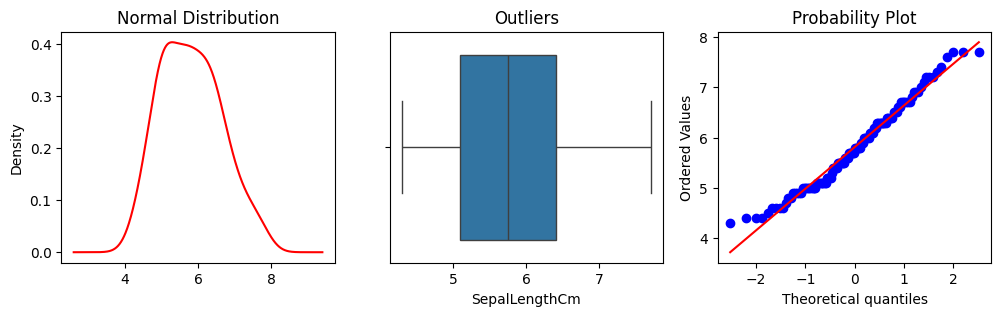

SepalWidthCm


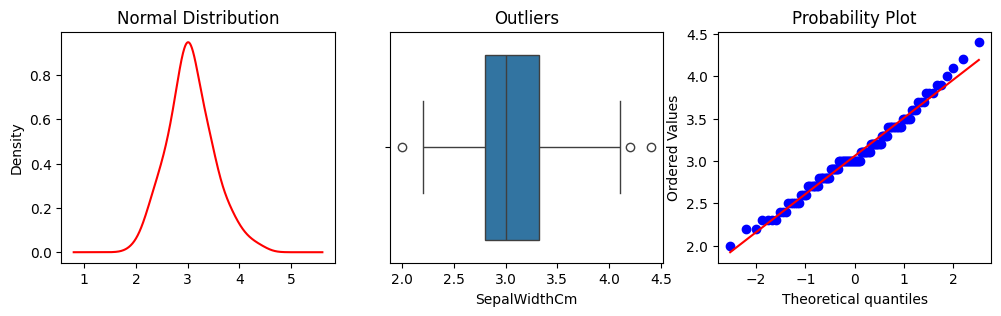

PetalLengthCm


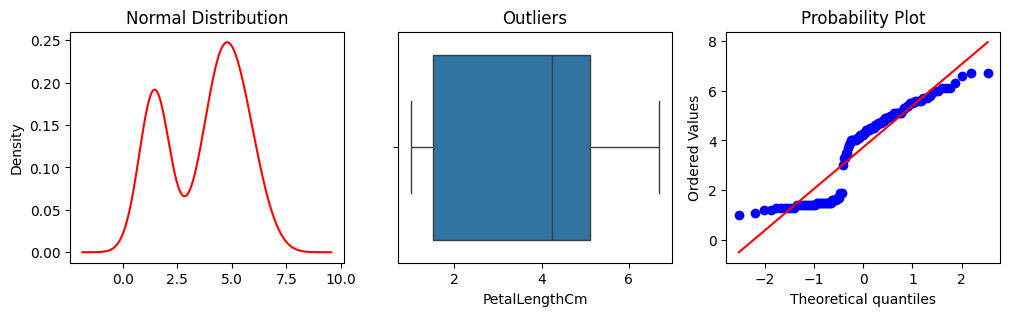

PetalWidthCm


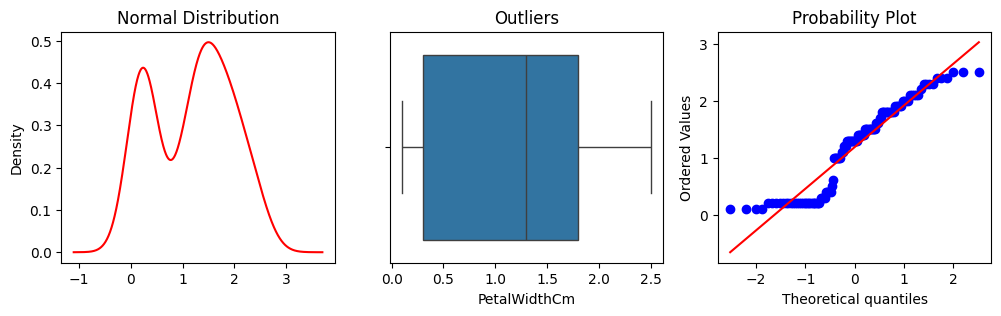

In [20]:
for i in X_train.columns:
  visualization_eda(X_train,i)

In [21]:
#log technique
for i in X_train.columns:
  X_train[i+'log']=np.log(X_train[i]+1)

for i in X_train.columns:
  if '_log' in i:
    visualization_eda(X_train,i)

In [22]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalLengthCmlog,SepalWidthCmlog,PetalLengthCmlog,PetalWidthCmlog
22,4.6,3.6,1.0,0.2,1.722767,1.526056,0.693147,0.182322
15,5.7,4.4,1.5,0.4,1.902108,1.686399,0.916291,0.336472
65,6.7,3.1,4.4,1.4,2.041220,1.410987,1.686399,0.875469
11,4.8,3.4,1.6,0.2,1.757858,1.481605,0.955511,0.182322
42,4.4,3.2,1.3,0.2,1.686399,1.435085,0.832909,0.182322


In [23]:
X_train=X_train.drop(['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'],axis=1)

In [24]:
#For X_test

for i in X_test.columns:
  X_test[i+'log']=np.log(X_test[i]+1)

for i in X_test.columns:
  if '_log' in i:
    visualization_eda(X_test,i)

X_test=X_test.drop(['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'],axis=1)

checking outliers


In [25]:
# to check each column outliers
def outlier_checking(X_train,var):
  print(var)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title('Normal Distribution')
  X_train[var].plot(kind='kde',color='r')
  plt.subplot(1,3,2)
  plt.title('Outliers')
  sns.boxplot(x = X_train[var])
  plt.show()

SepalLengthCmlog


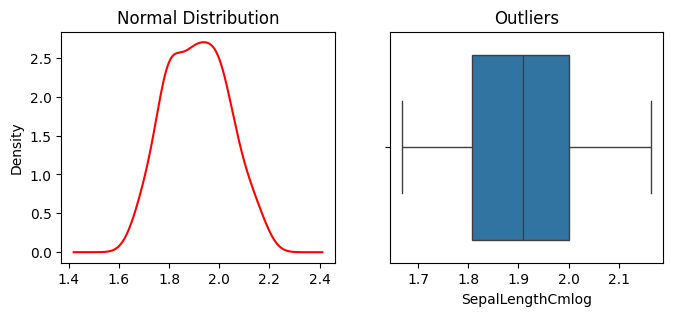

SepalWidthCmlog


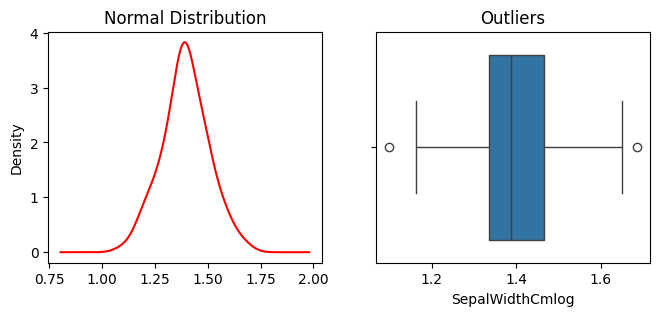

PetalLengthCmlog


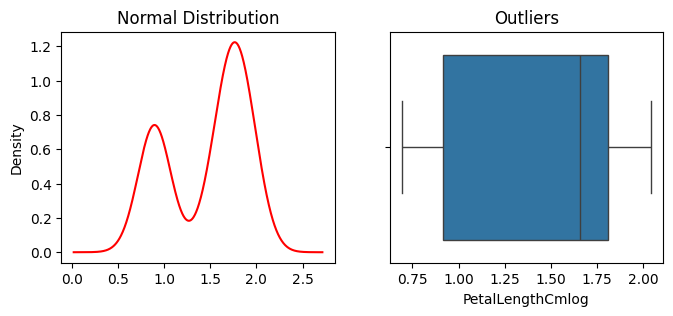

PetalWidthCmlog


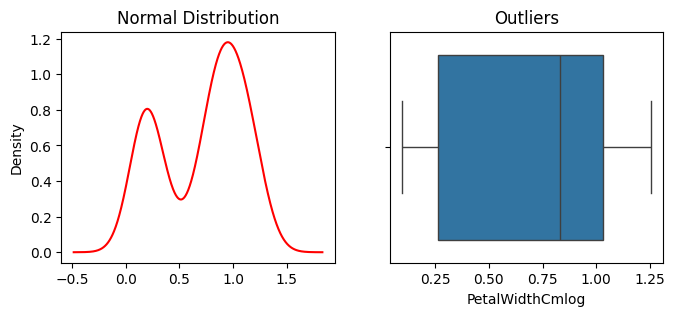

In [26]:
for i in X_train.columns:
  outlier_checking(X_train,i)

In [27]:
X_train.head()

,SepalLengthCmlog,SepalWidthCmlog,PetalLengthCmlog,PetalWidthCmlog
22,1.722767,1.526056,0.693147,0.182322
15,1.902108,1.686399,0.916291,0.336472
65,2.041220,1.410987,1.686399,0.875469
11,1.757858,1.481605,0.955511,0.182322
42,1.686399,1.435085,0.832909,0.182322


In [28]:
X_test.head()

,SepalLengthCmlog,SepalWidthCmlog,PetalLengthCmlog,PetalWidthCmlog
73,1.960095,1.335001,1.740466,0.788457
18,1.902108,1.568616,0.993252,0.262364
118,2.163323,1.280934,2.066863,1.193922
78,1.945910,1.360977,1.704748,0.916291
76,2.054124,1.335001,1.757858,0.875469


In [29]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

target_train = pd.DataFrame({'y_train_con':y_train_encoded})
target_test = pd.DataFrame({'y_test_con':y_test_encoded})

In [30]:
target_train

,y_train_con
0,0
1,0
2,1
3,0
4,0
...,...
115,1
116,2
117,0
118,1


**Feature Selection Part on X_train_num_cols and X_test_Num_cols**

- `constant technique = variance 0`
- `quasi constant technique `
- `correlation with p_value [Hypothesis Testing ]`

In [31]:
len(X_train.columns)

4

In [32]:
# constant technique

con_tech = VarianceThreshold(threshold=0.0)
con_tech.fit(X_train)
X_train.columns[con_tech.get_support()]

Index(['SepalLengthCmlog', 'SepalWidthCmlog', 'PetalLengthCmlog',
       'PetalWidthCmlog'],
      dtype='object')

In [33]:
constant = X_train.columns[~con_tech.get_support()]

len(constant)

0

In [34]:
# Quasi constant = variance 0.1

con_tech = VarianceThreshold(threshold=0.1)
con_tech.fit(X_train)
X_train.columns[con_tech.get_support()]
constant = X_train.columns[~con_tech.get_support()]

constant

Index(['SepalLengthCmlog', 'SepalWidthCmlog'], dtype='object')

In [35]:
#hypothesis testing
co_pval = []
for i in X_train.columns:
    co_pval.append(stats.pearsonr(X_train[i], target_train['y_train_con']))

co_pval

[PearsonRResult(statistic=0.7707493975063642, pvalue=7.504365466583287e-25),
 PearsonRResult(statistic=-0.41889973646818185, pvalue=1.9200680597726308e-06),
 PearsonRResult(statistic=0.933530684102312, pvalue=2.1075728849099783e-54),
 PearsonRResult(statistic=0.9442503985717854, pvalue=8.99905154455933e-59)]

In [36]:
co_pval = np.array(co_pval) # to target only p_value
co_pval

array([[ 7.70749398e-01,  7.50436547e-25],
       [-4.18899736e-01,  1.92006806e-06],
       [ 9.33530684e-01,  2.10757288e-54],
       [ 9.44250399e-01,  8.99905154e-59]])

<Axes: >

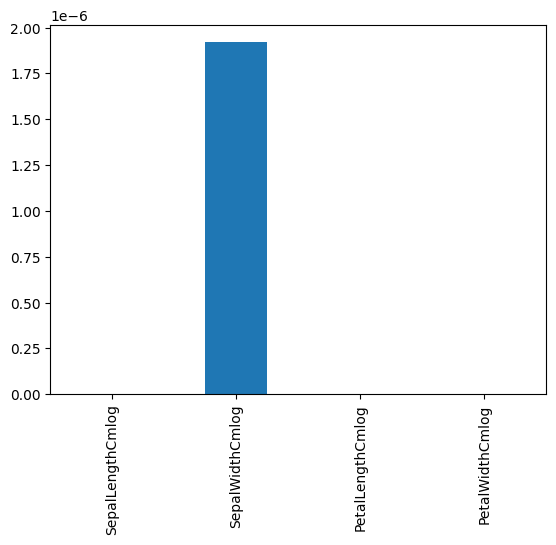

In [37]:
s = pd.Series(data = co_pval[: , 1],index = X_train.columns) # to get each column p_value
s.plot.bar()

In [38]:
co_pval[: , 1]

array([7.50436547e-25, 1.92006806e-06, 2.10757288e-54, 8.99905154e-59])

In [39]:
X_train.columns

Index(['SepalLengthCmlog', 'SepalWidthCmlog', 'PetalLengthCmlog',
       'PetalWidthCmlog'],
      dtype='object')

In [40]:
y_train.value_counts()

,count
Species,
Iris-versicolor,41
Iris-setosa,40
Iris-virginica,39


scaling down the values for accurate predictions




In [41]:
# standard_scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
res = sc.transform(X_train)

#res -> to give scaled down outputs

scaled_X_train = pd.DataFrame(data=res)
scaled_X_train.columns = X_train.columns

scaled_X_train.head()

,SepalLengthCmlog,SepalWidthCmlog,PetalLengthCmlog,PetalWidthCmlog
0,-1.572424,1.203273,-1.827124,-1.401302
1,-0.074908,2.670960,-1.302936,-0.994470
2,1.086699,0.149993,0.506131,0.428044
3,-1.279408,0.796387,-1.210802,-1.401302
4,-1.876098,0.370568,-1.498808,-1.401302


In [42]:
# to apply same thing on test data

res = sc.transform(X_test)

scaled_X_test = pd.DataFrame(data=res)
scaled_X_test.columns = X_test.columns

scaled_X_test.head()

,SepalLengthCmlog,SepalWidthCmlog,PetalLengthCmlog,PetalWidthCmlog
0,0.409292,-0.545540,0.633141,0.198404
1,-0.074908,1.592840,-1.122146,-1.190055
2,2.106269,-1.040441,1.399881,1.268503
3,0.290848,-0.307774,0.549235,0.535781
4,1.194443,-0.545540,0.673996,0.428044


data is  ready we need to train the all classification alogorithms

In [43]:
from sklearn.metrics import precision_score

# Define KNN algorithm
def knn_algo(x_train, y_train, x_test, y_test):
    knn_res = KNeighborsClassifier(n_neighbors=5)
    knn_res.fit(x_train, y_train)
    y_test_pred = knn_res.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    print(f'Training Accuracy : {knn_res.score(x_train, y_train)}')
    print(f'Test Accuracy : {knn_res.score(x_test, y_test)}')
    print(f'Confusion Matrix Test data :\n{confusion_matrix(y_test, y_test_pred)}')
    print(f'Classification Report Test data :\n{classification_report(y_test, y_test_pred)}')
    return precision

# Define other algorithms similarly
def naive_bayes_algo(x_train, y_train, x_test, y_test):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_test_pred = nb.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def log_reg_algo(x_train, y_train, x_test, y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_test_pred = lr.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def dt_algo(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_test_pred = dt.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

def rf_algo(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    precision = precision_score(y_test, y_test_pred, average='macro')
    return precision

# Common function to find the best precision
def common(x_train, y_train, x_test, y_test):
    precisions = {}

    print('-----KNN-------')
    precisions['KNN'] = knn_algo(x_train, y_train, x_test, y_test)

    print('-----Naive Bayes------')
    precisions['Naive Bayes'] = naive_bayes_algo(x_train, y_train, x_test, y_test)

    print('-----Logistic Regression-------')
    precisions['Logistic Regression'] = log_reg_algo(x_train, y_train, x_test, y_test)

    print('-----Decision Tree-------')
    precisions['Decision Tree'] = dt_algo(x_train, y_train, x_test, y_test)

    print('-----Random Forest-------')
    precisions['Random Forest'] = rf_algo(x_train, y_train, x_test, y_test)

    # Find the model with the best precision
    best_model = max(precisions, key=precisions.get)
    print(f"\nBest Model: {best_model} with Precision: {precisions[best_model]:.4f}")

In [66]:
final_X_train = scaled_X_train.copy()
final_y_train = target_train.copy()
final_X_test = scaled_X_test.copy()
final_y_test = target_test.copy()

In [45]:
common(final_X_train,final_y_train,final_X_test,final_y_test)

-----KNN-------
Training Accuracy : 0.95
Test Accuracy : 1.0
Confusion Matrix Test data :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report Test data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

-----Naive Bayes------
-----Logistic Regression-------
-----Decision Tree-------
-----Random Forest-------

Best Model: KNN with Precision: 1.0000


In [68]:
# Best parameters

from sklearn.neighbors import KNeighborsClassifier
final_model= KNeighborsClassifier(n_neighbors=5) # default k value is = 5
final_model.fit(final_X_train,final_y_train)

KNeighborsClassifier()

In [69]:
print(f'Final Test Accuracy : {final_model.score(final_X_test,final_y_test)}')

Final Test Accuracy : 1.0


In [70]:
len(final_X_train.columns)

4

In [71]:
final_X_train.columns

Index(['SepalLengthCmlog', 'SepalWidthCmlog', 'PetalLengthCmlog',
       'PetalWidthCmlog'],
      dtype='object')

In [72]:
values = [4.3,1.3,2.0,0.2]
sc.transform([values])

array([[19.9477502 , -0.86591977,  1.24281355, -1.35464567]])

In [73]:


if final_model.predict(sc.transform([values]))[0] == 0:
  print(f'Iris-setosa')
elif final_model.predict(sc.transform([values]))[0] == 1 :
  print(f'Iris-versicolor')

else:
  print("Iris-virginica	")

Iris-virginica	


In [74]:
# save the Model

import pickle

with open('iris_model.pkl','wb') as f:
  pickle.dump(final_model,f)

In [75]:
# save the scaling

import pickle

with open('scaling_data.pkl','wb') as f:
  pickle.dump(sc,f)

##ANN

In [76]:
# instead of giving the data to ML Models
# give the Data to ANN [Neural Networks]
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import relu,sigmoid,softmax
import warnings
warnings.filterwarnings('ignore')

In [78]:
# define the architecture

model = Sequential()

# input to 1st Hidden layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation=relu,input_dim=X_train.shape[1]))


# outcome from 1st H.Layer will be given to 2nd H.Layer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation=relu))


# outcome from 2nd H.Layer will be given to 3nd H.Layer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation=relu))

# outcome from 3nd H.Layer will be given to 4th H.Layer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation=relu))


# outcome from 4th H.Layer will be given to 5th H.Layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation=relu))


# outcome from 5th H.Layer will be given to output layer
model.add(Dense(units=3,kernel_initializer='glorot_uniform',activation=softmax))

In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,667 (45.57 KB)

 Trainable params: 11,667 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# metrics
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])


In [81]:
X_train.shape

(120, 4)

In [83]:
X_train.head(2)

,SepalLengthCmlog,SepalWidthCmlog,PetalLengthCmlog,PetalWidthCmlog
22,1.722767,1.526056,0.693147,0.182322
15,1.902108,1.686399,0.916291,0.336472


In [85]:
y_train_p = tensorflow.keras.utils.to_categorical(final_y_train,num_classes=3)
y_train_p

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [100]:
 # Train the Model
model.fit(X_train,y_train_p,batch_size=20,validation_split=0.2,epochs=5)

Epoch 1/5


AttributeError: 'NoneType' object has no attribute 'items'